In [1]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [17]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [23]:
library(MASS)
library(dplyr)
library(mgcv)
library(rpart)

In [11]:
loan3000 <- read.csv('./data/loan3000.csv', header = TRUE)

In [12]:
head(loan3000)

,X,outcome,purpose_,dti,borrower_score,payment_inc_ratio
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,32109,paid off,debt_consolidation,21.23,0.40,5.11135
2,16982,default,credit_card,15.49,0.40,5.43165
3,25335,paid off,debt_consolidation,27.30,0.70,9.23003
4,34580,paid off,major_purchase,21.11,0.40,2.33482
5,14424,default,debt_consolidation,16.46,0.45,12.10320
6,35621,paid off,debt_consolidation,12.12,0.50,3.89391


In [13]:
rf <- randomForest(outcome ~ borrower_score + payment_inc_ratio, data = loan3000)

In [14]:
rf


Call:
 randomForest(formula = outcome ~ borrower_score + payment_inc_ratio,      data = loan3000) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 39.2%
Confusion matrix:
         default paid off class.error
default      877      568   0.3930796
paid off     608      947   0.3909968

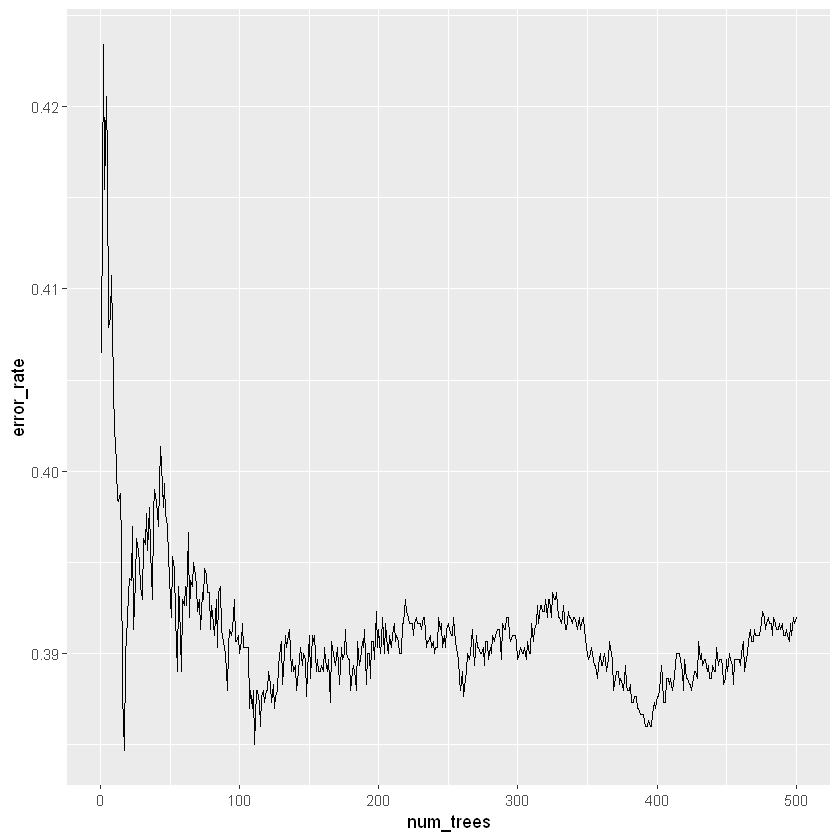

In [18]:
error_df = data.frame(error_rate = rf$err.rate[,'OOB'],
                     num_trees = 1:rf$ntree)
ggplot(error_df, aes(x=num_trees, y=error_rate)) + geom_line()

Warning message:
"Removed 18 rows containing missing values (geom_point)."

null device 
          1

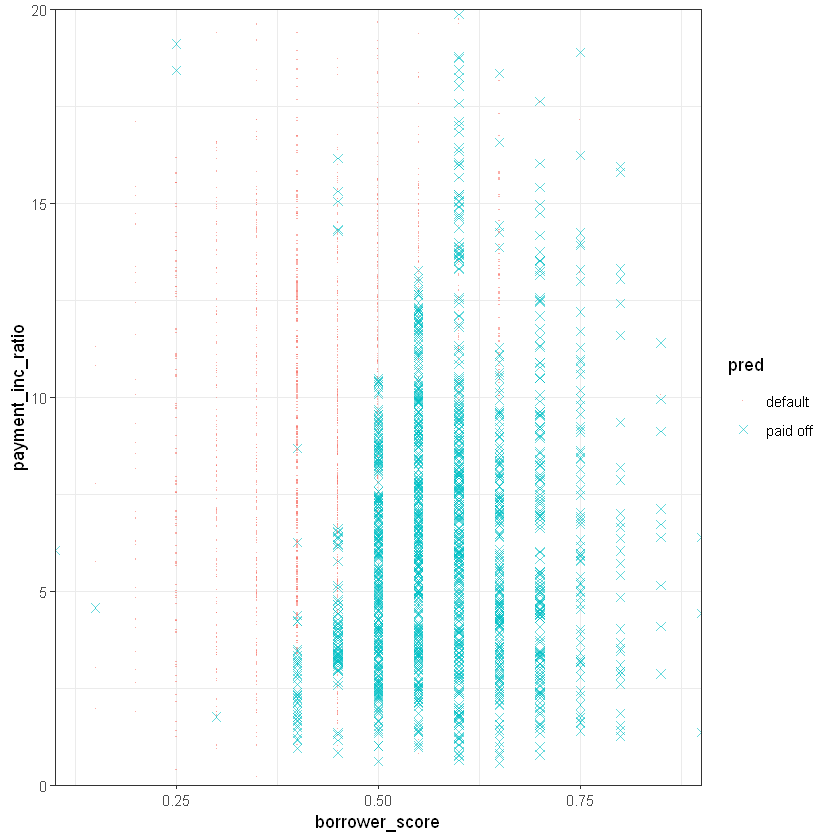

In [31]:
pred <- predict(rf, prob=TRUE)
rf_df <- cbind(loan3000, pred = pred)

ggplot(data=rf_df, aes(x=borrower_score, y=payment_inc_ratio, 
                       shape=pred, color=pred)) +
  geom_point(alpha=.6, size=2) +
  scale_shape_manual( values=c( 46, 4)) +
  scale_x_continuous(expand=c(0,0)) + 
  scale_y_continuous(expand=c(0,0), lim=c(0, 20)) + 
  theme_bw()
dev.off()

In [39]:
loan_data <- read.csv('./data/loan_data.csv')
#loan_data$outcome <- ordered(loan_data$outcome, levels=c('paid off', 'default'))

In [40]:
head(loan_data)

,X,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,...,<int>,<int>,<int>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
1,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
6,6,Charged Off,21000,36 months,105000,13.22,8.01977,32135,90.3,debt_consolidation,...,1,1,7,5.8,default,11,debt_consolidation,RENT,> 1 Year,0.40


In [41]:
rf_all <- randomForest(outcome ~ ., data=loan_data, importance=TRUE)
rf_all


Call:
 randomForest(formula = outcome ~ ., data = loan_data, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0%
Confusion matrix:
         default paid off class.error
default    22671        0           0
paid off       0    22671           0

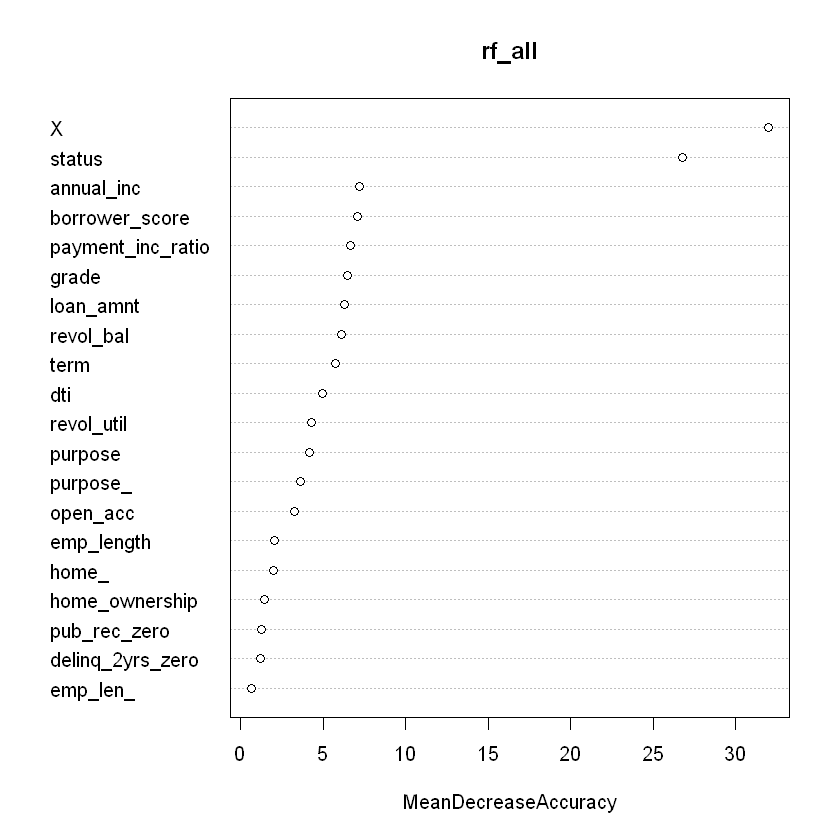

In [42]:
varImpPlot(rf_all, type=1)


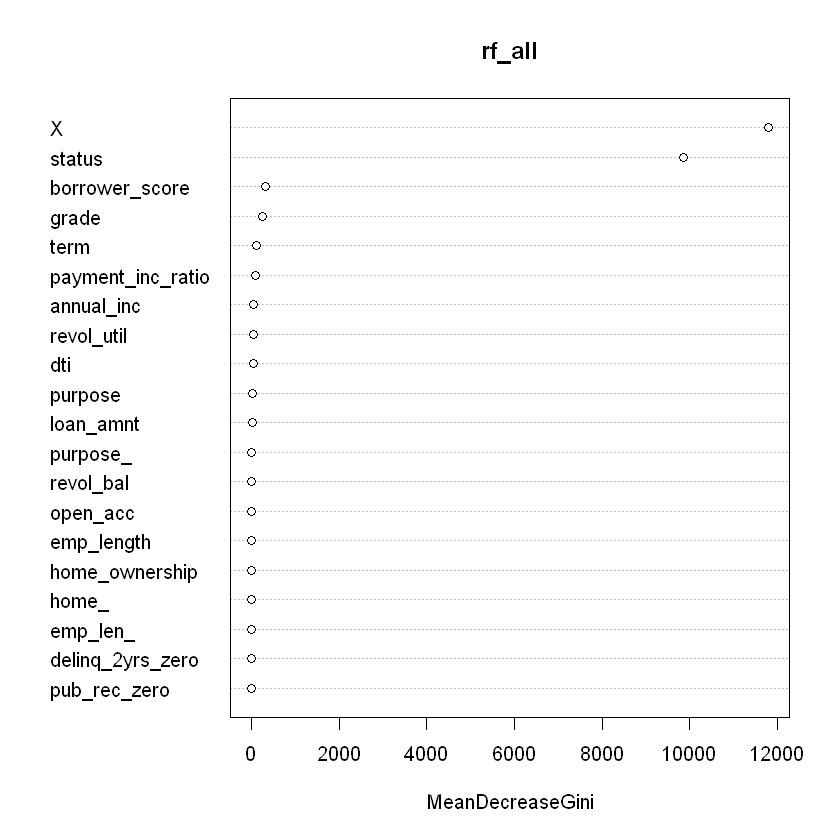

In [43]:
varImpPlot(rf_all, type=2)